<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Runge_Kutta_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solución de Problemas de Valor Inicial
### Juan Pablo Escobar Naranjo

Encuentre una aproximación a  $x(t)$ , dado:

$\dot { x } =f(t,x)$ 

$x(t)(t=0)=x_{0}$


### Método de Runge Kutta

Los métodos de Runge-Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor inicial.

Sean:

${\displaystyle y'(t)=f(t,y(t))\,}$
una ecuación diferencial ordinaria, con ${\displaystyle f:\Omega \subset \mathbb {R} \times \mathbb {R} ^{n}\to \mathbb {R} ^{n}}$ donde ${\displaystyle \Omega \,}$ es un conjunto abierto, junto con la condición de que el valor inicial de ƒ sea:

${\displaystyle (t_{0},y_{0})\in \Omega.}$

Entonces el método RK (de orden s) tiene la siguiente expresión, en su forma más general:

${\displaystyle y_{n+1}=y_{n}+h\,\sum _{i=1}^{s}b_{i}k_{i}}$ ,
donde h es el paso por iteración, o lo que es lo mismo, el incremento ${\displaystyle \Delta t_{n}}$ entre los sucesivos puntos ${\displaystyle t_{n}}$ y ${\displaystyle t_{n+1}}$. Los coeficientes ${\displaystyle k_{i}}$ son términos de aproximación intermedios, evaluados en ƒ de manera local.

${\displaystyle k_{i}=f\left(t_{n}+h\,c_{i}\,,y_{n}+h\,\sum _{j=1}^{s}a_{ij}k_{j}\right)\quad i=1,...,s.}$ \\
con ${\displaystyle a_{ij},b_{i},c_{i}}$ coeficientes propios del esquema numérico elegido, dependiente de la regla de cuadratura utilizada. Los esquemas Runge-Kutta pueden ser explícitos o implícitos dependiendo de las constantes ${\displaystyle a_{ij}}$ del esquema. Si esta matriz es triangular inferior con todos los elementos de la diagonal principal iguales a cero; es decir, ${\displaystyle a_{ij}=0}$ para ${\displaystyle j=i,...,s}$, los esquemas son explícitos. \\

Existen variantes del método de Runge-Kutta clásico, también llamado Runge-Kutta explícito, tales como la versión implícita del procedimiento o las parejas de métodos Runge-Kutta (o métodos Runge-Kutta-Fehlberg).
 Este último consiste en ir aproximando la solución de la ecuación mediante dos algoritmos Runge-Kutta de órdenes diferentes, para así mantener el error acotado y hacer una buena elección de paso.



### Método de Runge Kutta de cuarto orden

Un miembro de la familia de los métodos Runge-Kutta usado ampliamente es el de cuarto orden. Es usado tanto que a menudo es referenciado como "RK4" o como "el método Runge-Kutta".

Definiendo un problema de valor inicial como:

${\displaystyle y'=f(x,y),\quad y(x_{0})=y_{0}}$
Entonces el método RK4 para este problema está dado por la siguiente ecuación:

${\displaystyle y_{i+1}=y_{i}+{1 \over 6}h\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)}$

Donde,

${\displaystyle {\begin{cases}k_{1}&=f\left(x_{i},y_{i}\right)\\k_{2}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{1}h\right)\\k_{3}&=f\left(x_{i}+{1 \over 2}h,y_{i}+{1 \over 2}k_{2}h\right)\\k_{4}&=f\left(x_{i}+h,y_{i}+k_{3}h\right)\\\end{cases}}}$ \\


Así, el siguiente valor (yn+1) es determinado por el presente valor (yn) más el producto del tamaño del intervalo (h) por una pendiente estimada. La pendiente es un promedio ponderado de pendientes, donde ${\displaystyle k_{1}}$ es la pendiente al principio del intervalo, ${\displaystyle k_{2}}$ es la pendiente en el punto medio del intervalo, usando ${\displaystyle k_{1}}$ para determinar el valor de y en el punto ${\displaystyle \scriptstyle x_{n}+{\frac {h}{2}}}$ usando el método de Euler. ${\displaystyle k_{3}}$ es otra vez la pendiente del punto medio, pero ahora usando ${\displaystyle k_{2}}$ para determinar el valor de y; ${\displaystyle k_{4}}$ es la pendiente al final del intervalo, con el valor de y determinado por ${\displaystyle k_{3}}$. Promediando las cuatro pendientes, se le asigna mayor peso a las pendientes en el punto medio:

${\displaystyle {\mbox{pendiente}}={\frac {k_{1}+2k_{2}+2k_{3}+k_{4}}{6}}.}$

Esta forma del método de Runge-Kutta, es un método de cuarto orden lo cual significa que el error por paso es del orden de ${\displaystyle O(h^{5})}$, mientras que el error total acumulado tiene el orden ${\displaystyle O(h^{4})}$.  Por lo tanto, la convergencia del método es del orden de ${\displaystyle O(h^{4})}$, razón por la cual es usado en los métodos computacionales.

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#Definimos el método de Runge Kutta de cuarto orden

def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

A continuación vamos a definir los sistemas que queremos analizar:


#### Sistema 1: 
\begin{equation}
\dot { x } =ax
\end{equation}

#### Sistema 2: 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

#### Sistema 3 (Ecuación Logística): 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}


#### Sistema 4 (Circuito RC Transladado): 
\begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}


In [ ]:

def sistema1(t, x, a):
    x_dot = a*x
    return x_dot

def sistema2(t, x, a):
    x_dot = a*np.sin(x)
    return x_dot    

def sistema3(t, x, a):
    x_dot = 0.02*x*(1-x/a)
    return x_dot

def sistema4(t, x, a):
    x_dot = -x/(a)
    return x_dot

### Sistema Lineal 

1. \begin{equation}
\dot { x } =ax
\end{equation}


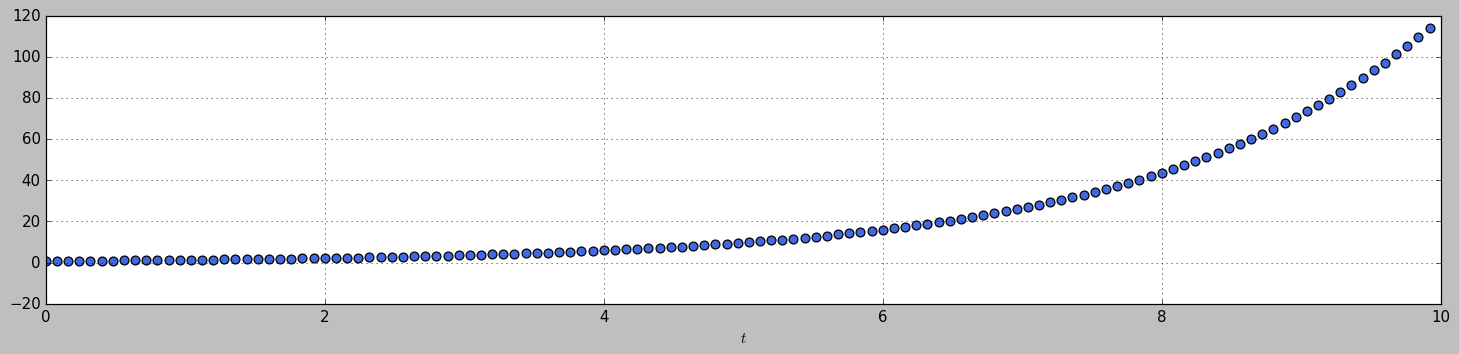

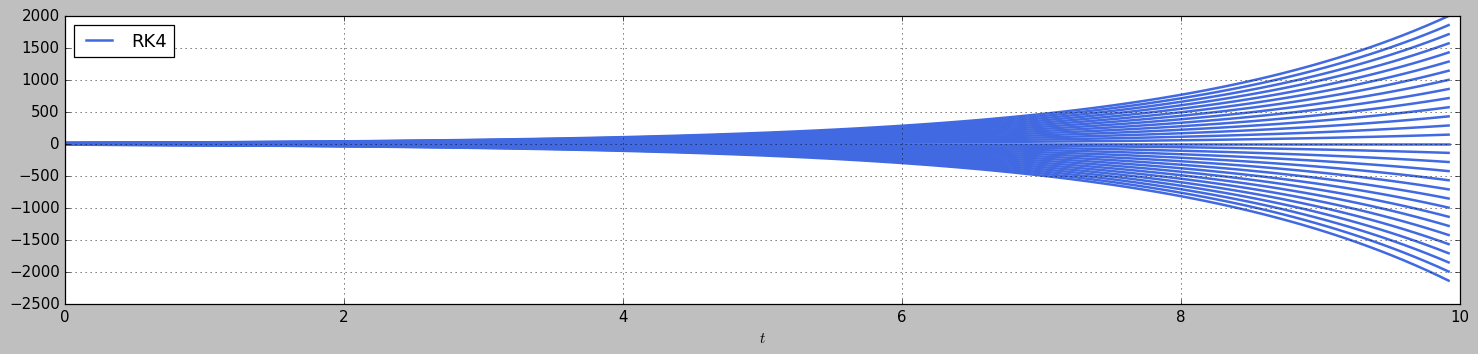

In [ ]:
a = 0.5
h = 0.08
ti = 0
tf = 10
x0 = 0.8

t1,x1 = rk4( sistema1, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'royalblue', label = 'RK4', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()



plt.figure(figsize=(20, 4), dpi=90)
for i in range(-15,15,1):
    x0=i
    t1,x1 = rk4( sistema1, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'royalblue', linewidth = 2)


plt.xlim([0, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Sistema No lineal 

2. 
\begin{equation}
\dot { x } =sin(x)
\end{equation}

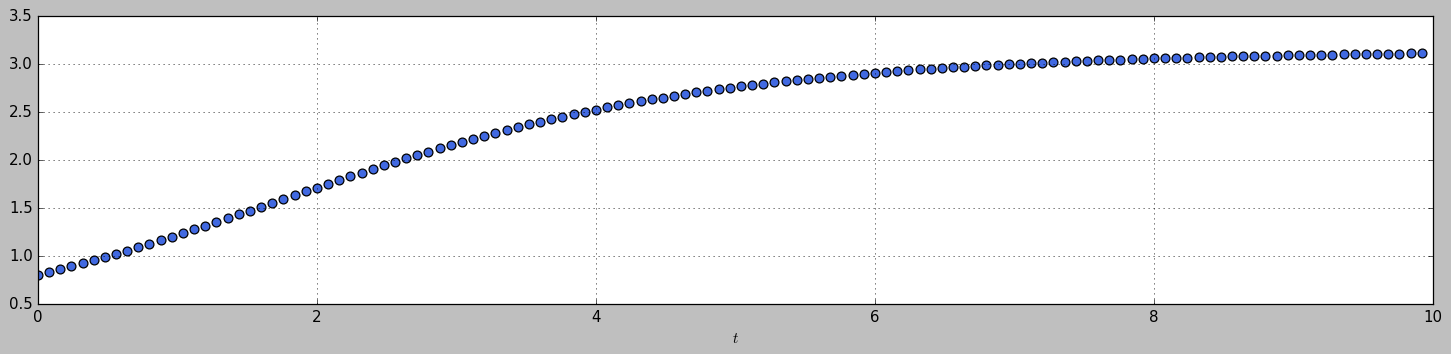

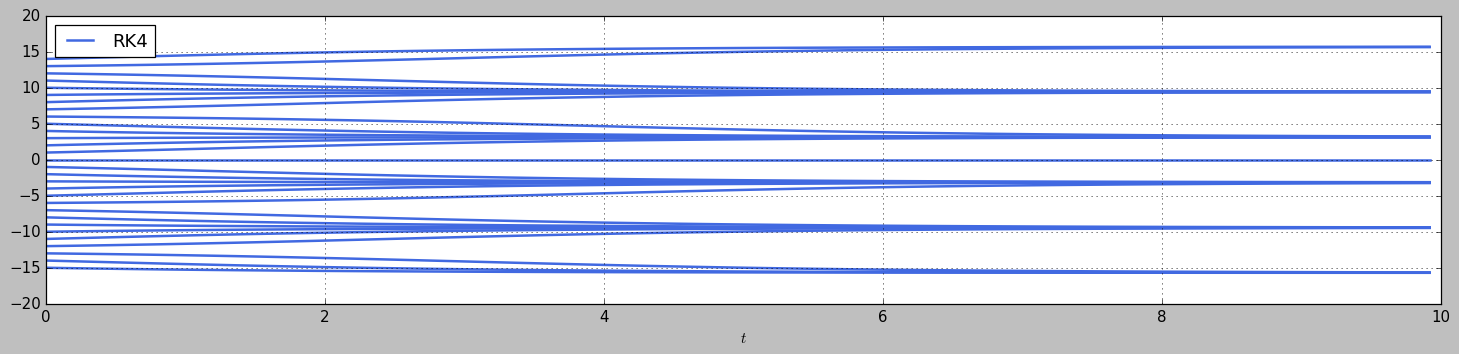

In [ ]:
a = 0.5
h = 0.08
ti = 0
tf = 10
x0 = 0.8

t1,x1 = rk4( sistema2, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'royalblue', label = 'RK4', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()



plt.figure(figsize=(20, 4), dpi=90)
for i in range(-15,15,1):
    x0=i
    t1,x1 = rk4( sistema2, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'royalblue', linewidth = 2)


plt.xlim([0, tfin])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

### Ecuación Logística

3. 
\begin{equation}
\dot { N } =rN\left( 1-\frac { N }{ K }  \right) 
\end{equation}

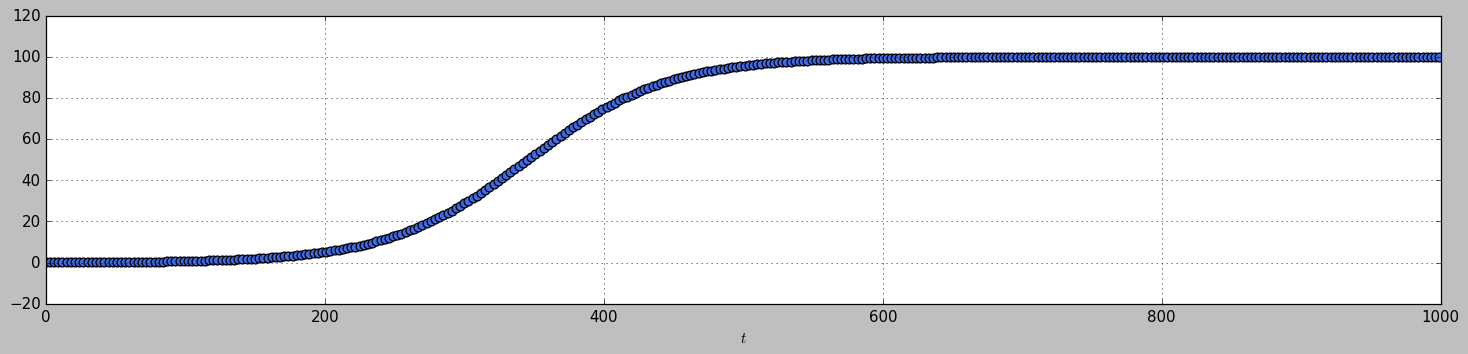

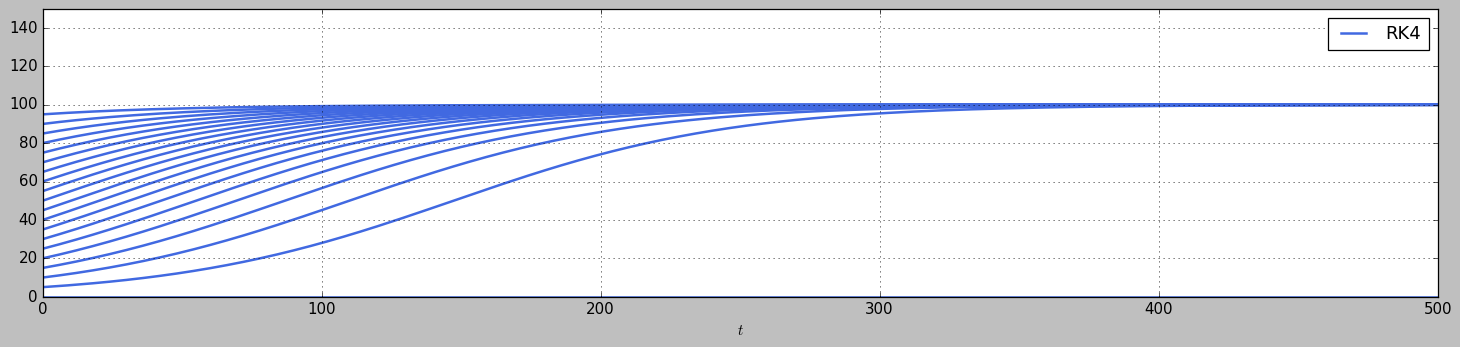

In [ ]:
a = 100
h = 3
ti = 0
tf = 1000
x0 = 0.1

t1,x1 = rk4( sistema3, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'royalblue', label = 'RK4', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()


plt.figure(figsize=(20, 4), dpi=90)
for i in range(-100,100,5):
    x0=i
    t1,x1 = rk4( sistema3, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'royalblue', linewidth = 2)


plt.xlim([0, 500])
plt.ylim([0, 150])
plt.xlabel(r'$t$')
plt.legend(loc = 'best')
plt.grid()
plt.show()

### Circuito RC (Transladado) 


4. \begin{equation}
\dot { Q } =\frac { V_{ 0 } }{ R } -\frac { Q }{ RC } 
\end{equation}

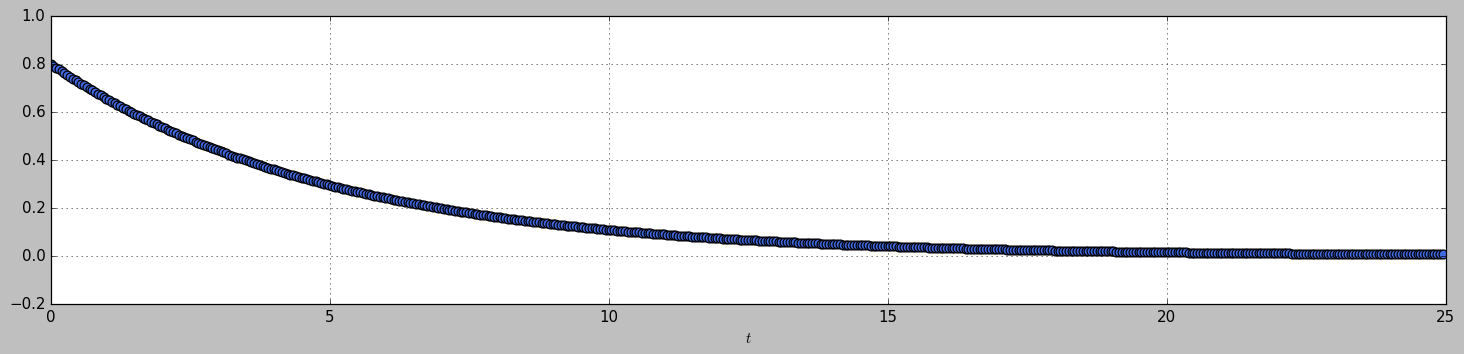

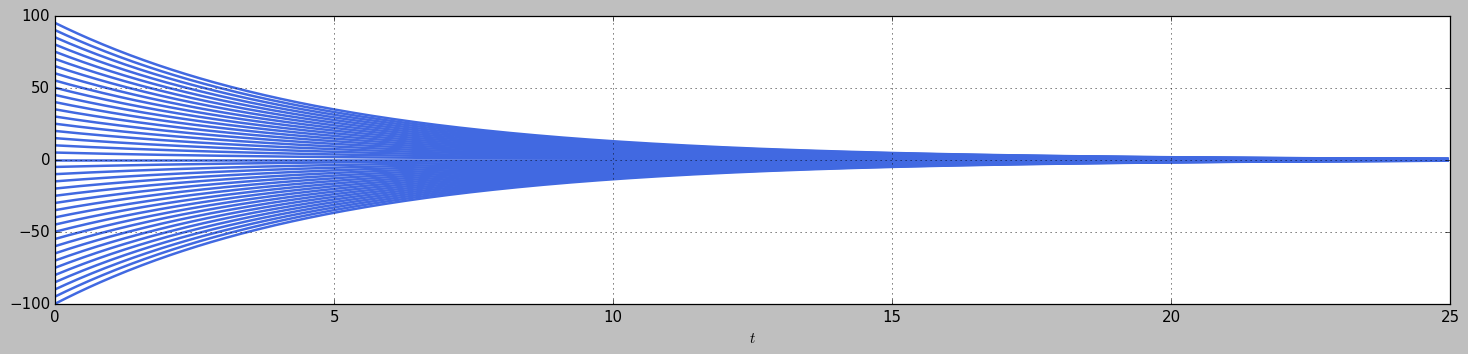

In [ ]:
R=1000
C=0.005
a=R*C
h= 0.05
ti = 0
tf = 25
x0 = 0.8

t1,x1 = rk4( sistema4, h, ti, tf, x0, a )
plt.figure(figsize=(20, 4), dpi=90)
plt.scatter( t1, x1, c = 'royalblue', label = 'RK4', s = 50)
plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()


plt.figure(figsize=(20, 4), dpi=90)
for i in range(-100,100,5):
    x0=i
    t1,x1 = rk4( sistema4, h, ti, tf, x0, a )
    if i==0:
      plt.plot( t1, x1, c = 'royalblue', label = 'RK4', linewidth = 2)
    else:
      plt.plot( t1, x1, c = 'royalblue', linewidth = 2)


plt.xlim([0, tf])
plt.xlabel(r'$t$')
plt.grid()
plt.show()
